# Assignment 1 - Exploratory Data Analysis

Michael Massaad (300293612) and Gabriel Zohrob (300309391)

## Goal/Objective:

This report aims to analyze two datasets from distinct domains (healthcare and consumer technology) to uncover meaningful insights through exploratory data analysis. The Heart Failure Prediction dataset is used to examine factors associated with heart failure outcomes, while the Smartphone Specifications dataset is analyzed to explore relationships between hardware features, performance characteristics, and pricing of mobile devices. The report presents ten insights for each dataset supported by visual and numerical evidence. The target audience for this analysis includes students and readers with a general interest in data analytics who may not have a strong technical background. Therefore, the findings are presented in a clear and interpretable manner, with an emphasis on explanation and visualization.

## Description of the Heart Failure Prediction Dataset:

Author: Fadesoriano

Purpose: Cardiovascular diseases are the leading cause of death worldwide, accounting for 17.9 million deaths annually (31% of all deaths worldwide), and early detection of heart failure risk can inform preventive care decisions (Fedesoriano). This dataset was created to support research into predicting heart disease (often used as a proxy for heart failure risk) using clinical and demographic indicators. It compiles clinical measurements and test results that are commonly associated with cardiovascular risk. The goal is to enable data exploration and machine learning modeling that can identify patterns associated with heart disease, which can help flag high-risk individuals for earlier medical intervention.

Shape: 918 rows and 12 columns

Features:
1. Age: age of the patient [years], Numerical

2. Sex: sex of the patient [M: Male, F: Female], Categorical

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic], Categorical

4. RestingBP: resting blood pressure [mm Hg], Numerical

5. Cholesterol: serum cholesterol [mm/dl], Numerical

6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise], [?asking prof]

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria], Categorical

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202], Numerical

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No], Categorical

10. Oldpeak: oldpeak = ST [Numeric value measured in depression], Numerical

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping], Categorical

12. HeartDisease: output class [1: heart disease, 0: Normal], [?ask prof]

Redundancy or Missing Values: Based on the dataset schema, there are no redundant features, as each column represents a distinct clinical or demographic attribute. The dataset schema does not indicate the presence of explicit missing values, as all features contain recorded entries for every observation. However, some numerical variables include zero values (for example the Cholesterol feature and the RestingBP feature) that may not be medically plausible and could implicitly represent missing or unrecorded measurements.

## Description Smartphone Specifications Dataset

Author: CODEWITHDEV

Purpose: This dataset provides technical specifications for a variety of smartphone models, allowing analysis of how different hardware and software features relate to characteristics such as performance, price, and overall device capabilities. It is useful for exploring trends in smartphone design and comparing devices across brands and specifications.

Shape: 968 rows and 27 columns

Features: 

1.  model: Smartphone model name; Categorical
2.  price: Retail price of the smartphone; Numerical 
3.  rating: User or expert rating score; Numerical
4.  os: Operating system (e.g., Android, iOS); Categorical 
5.  sim_type: SIM configuration (e.g., Single SIM, Dual SIM); Categorical 
6.  network_type: Supported network generation (e.g., 4G, 5G); Categorical
7.  VoLTE: Whether Voice over LTE is supported (Yes/No); Categorical  
8.  NFC: Whether Near Field Communication is supported (Yes/No); Categorical
9.  oir_blaster: Whether the phone has an IR blaster (Yes/No); Categorical 
10. chipset: Processor chipset model; Categorical
11. core_type: CPU core architecture/type; Categorical
12. clock_ghz: CPU clock speed in GHz; Numerical
13. ram_gb: RAM capacity in gigabytes; Numerical
14. storage_gb: Internal storage capacity in gigabytes; Numerical
15. battery_mah: Battery capacity in milliamp-hours; Numerical
16. fast_charge_w: Fast charging power in watts; Numerical
17. screen_size_in: Screen size in inches; Numerical
18. resolution: Screen resolution (e.g., 1080×2400); Categorical
19. refresh_rate_hz: Display refresh rate in Hz; Numerical
20. display_type: Screen technology (e.g., AMOLED, LCD); Categorical
21. rear_camera_mp_list: List of rear camera megapixel values; Categorical
22. rear_camera_count: Number of rear cameras; Numerical
23. rear_camera_max_mp: Maximum megapixel value among rear cameras; Numerical
24. front_camera_mp: Front camera megapixel value; Numerical
25. memory_card_supported: Whether external memory card is supported (Yes/No); Categorical
26. memory_card_type: Type of memory card supported (e.g., microSD); Categorical
27. memory_card_max_gb: Maximum supported external memory capacity in GB; Numerical


Based on the dataset schema, Sparse data in fast_charge_w (20%), refresh_rate_hz (37%), and memory_card_max_gb (48%) usually indicates the absence of that feature in specific models (e.g., no fast charging or no SD card slot) (Taken from the website). In addition, although the dataset does not contain direct duplicate features, there are variables that represent closely related concepts. 

## Insights for the Heart Failure Prediction Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart_url = "https://raw.githubusercontent.com/michaelmassaad02/CSI4142_Assignment1/refs/heads/main/heart.csv" 
heart_failure = pd.read_csv(heart_url)

heart_failure.shape

(918, 12)

### R1 Insight: The highest proportion of patients (~42.23%) are of ages 50 to 60.

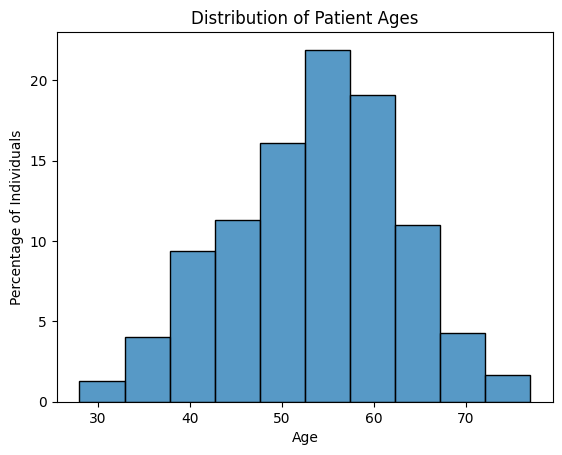

In [3]:
sns.histplot(data=heart_failure, x = "Age",bins=10, stat = "percent")

plt.title("Distribution of Patient Ages")
plt.ylabel("Percentage of Individuals")
plt.show()

In [4]:
# total number of rows
total = len(heart_failure)

# count how many ages are between 50 and 60 (inclusive)
count_50_60 = heart_failure[(heart_failure["Age"] >= 50) & (heart_failure["Age"] <= 60)].shape[0]

# compute percentage
percentage_50_60 = (count_50_60 / total) * 100

f"{percentage_50_60:.2f}%"



'44.23%'

Type of Analysis: Univariate Analysis Numerical Data

### R2 Insight: The dataset contains a higher percentage of male patients (~78.98%) than female patients (~21.02%).

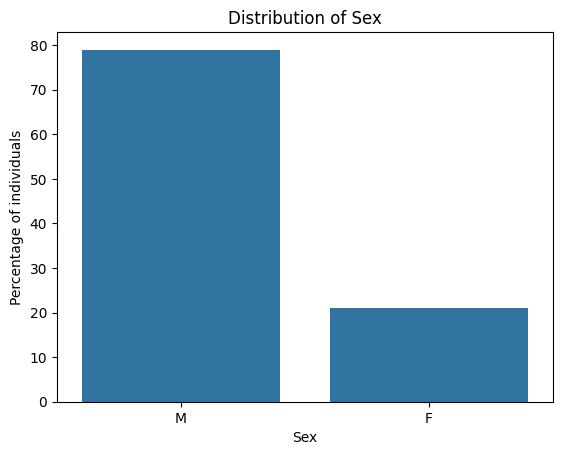

In [5]:
sns.countplot(data=heart_failure, x="Sex", stat = "percent")

plt.title("Distribution of Sex")
plt.ylabel("Percentage of individuals")
plt.show()

In [6]:
sex_percent = heart_failure["Sex"].value_counts(normalize=True) * 100

male_pct = f"{sex_percent['M']:.2f}%"
female_pct = f"{sex_percent['F']:.2f}%"

male_pct, female_pct

('78.98%', '21.02%')

Type of Analysis: Univariate Analysis Categorical Data

### R3 Insight: Within the grouped chest pain categories, the dataset contains a higher percentage of asymptomatic patients (~54.03%) than angina (~23.86%) and non-anginal (~22.11%) patients. 

Grouping Explanation: The ChestPainType variable contains four original categories: TA (Typical Angina), ATA (Atypical Angina), NAP (Non-Anginal Pain), and ASY (Asymptomatic). To reduce the number of distinct categories and form broader, more interpretable groups, TA and ATA were merged into a single Angina category since both represent forms of angina, while NAP was labeled Non-Anginal and ASY remained Asymptomatic. This grouping simplifies the variable while preserving the general meaning of each chest pain type.

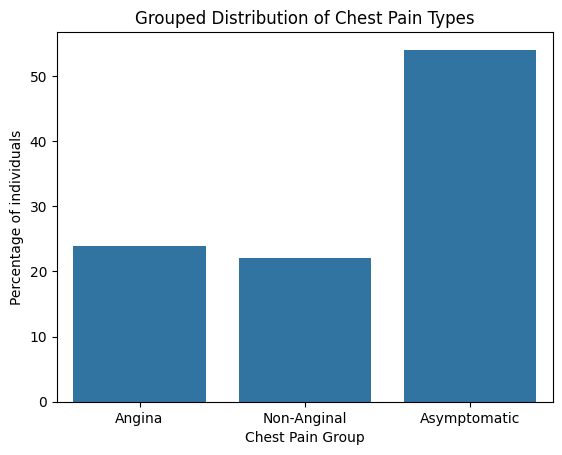

In [7]:
#Code to group as a Hashmap

chest_map = {
    "TA": "Angina",
    "ATA": "Angina",
    "NAP": "Non-Anginal",
    "ASY": "Asymptomatic"
}

heart_failure["ChestPainGroup"] = heart_failure["ChestPainType"].map(chest_map)

#Code to plot
sns.countplot(data=heart_failure, x="ChestPainGroup", stat = "percent")

plt.title("Grouped Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Group")
plt.ylabel("Percentage of individuals")
plt.show()

In [8]:
#Code to obtain the Percentages for the 3 different groups
chest_percent = heart_failure["ChestPainGroup"].value_counts(normalize=True) * 100

angina_pct = f"{chest_percent['Angina']:.2f}%"
non_anginal_pct = f"{chest_percent['Non-Anginal']:.2f}%"
asymptomatic_pct = f"{chest_percent['Asymptomatic']:.2f}%"

angina_pct, non_anginal_pct, asymptomatic_pct

('23.86%', '22.11%', '54.03%')

Type of Analysis: Univariate Analysis Categorical Data

### R4 Insight: For male patients, the median age is 55 years old, which is higher than the median age for female patients, which is 53 years old.

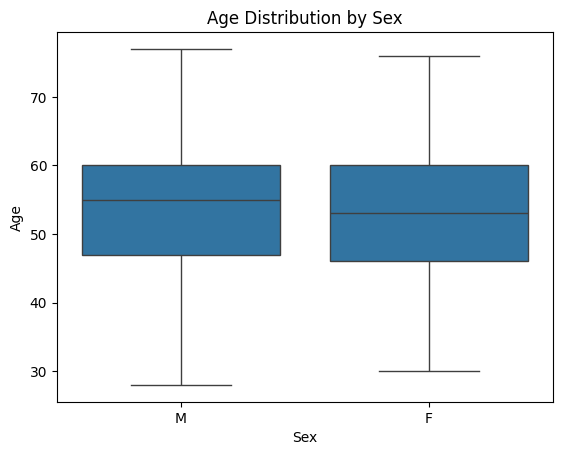

In [9]:
sns.boxplot(data=heart_failure, x="Sex", y="Age")

plt.title("Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

In [10]:
#code to extract the medians

medians = heart_failure.groupby("Sex")["Age"].median()

male_median = float(medians["M"])
female_median = float(medians["F"])

male_median, female_median

(55.0, 53.0)

Type of Analysis: Bivariate Analysis Numerical/Categorical

### R5 Insight: For both males and females, a higher percentage of patients do not exhibit exercise-induced angina compared to those who do (43.25% of patients are male and do not have exercise induced angina, 16.34% of patients are female and do not have exercise induced angina; whereas 35.73% of patients are male and have exercise induced angina, and 4.68% of patients are female and have exercise induced angina).

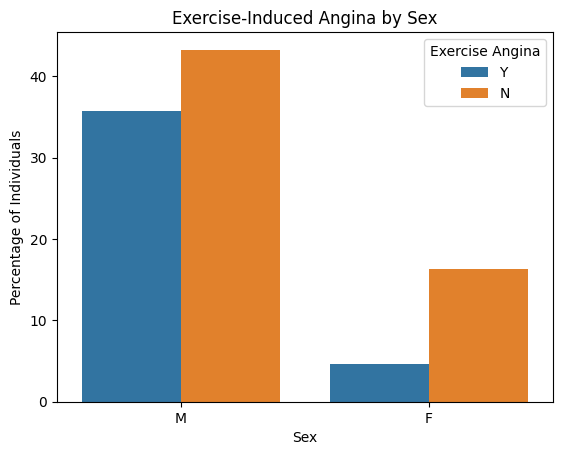

In [11]:
sns.countplot(
    data=heart_failure, 
    x="Sex", 
    hue="ExerciseAngina", 
    hue_order=["Y", "N"],
    stat="percent"
)

plt.title("Exercise-Induced Angina by Sex")
plt.xlabel("Sex")
plt.ylabel("Percentage of Individuals")
plt.legend(title="Exercise Angina")
plt.show()

In [12]:
total = len(heart_failure)

r5_total_percent = (
    heart_failure
    .groupby(["Sex", "ExerciseAngina"])
    .size()
    .div(total)
    .mul(100)
    .unstack(fill_value=0)
    .round(2)
)

male_Y = float(r5_total_percent.loc["M", "Y"])
male_N = float(r5_total_percent.loc["M", "N"])
female_Y = float(r5_total_percent.loc["F", "Y"])
female_N = float(r5_total_percent.loc["F", "N"])

male_Y, male_N, female_Y, female_N


(35.73, 43.25, 4.68, 16.34)

Type of Analysis: Bivariate Analysis Categorical/Categorical

### R6 Insight: When chest pain types are ordered by frequency, asymptomatic (ASY) cases account for the largest overall proportion of patients across all ST segment slope categories, totaling approximately 54.03% of the dataset.

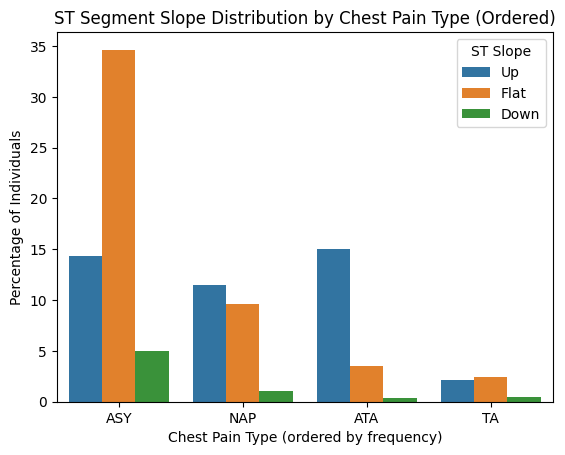

In [13]:
#Order ChestPainType by decreasing frequency:

order = heart_failure["ChestPainType"].value_counts().index

#Plot

sns.countplot(
    data=heart_failure,
    x="ChestPainType",
    hue="ST_Slope",
    order=order,
    stat="percent"
)

plt.title("ST Segment Slope Distribution by Chest Pain Type (Ordered)")
plt.xlabel("Chest Pain Type (ordered by frequency)")
plt.ylabel("Percentage of Individuals")
plt.legend(title="ST Slope")
plt.show()

In [14]:
# Percent of total dataset for each ChestPainType × ST_Slope combination
r6_percent = (
    heart_failure
    .groupby(["ChestPainType", "ST_Slope"])
    .size()
    .div(len(heart_failure))
    .mul(100)
    .unstack(fill_value=0)
    .round(2)
)

r6_percent

ST_Slope,Down,Flat,Up
ChestPainType,,,
ASY,5.01,34.64,14.38
ATA,0.33,3.49,15.03
NAP,1.09,9.59,11.44
TA,0.44,2.40,2.18


Type of Analysis: Bivariate Analysis Categorical/Categorical

### R7 Insight: The highest percentage of patients with heart disease is in the 51–60 age group (~24.26%).

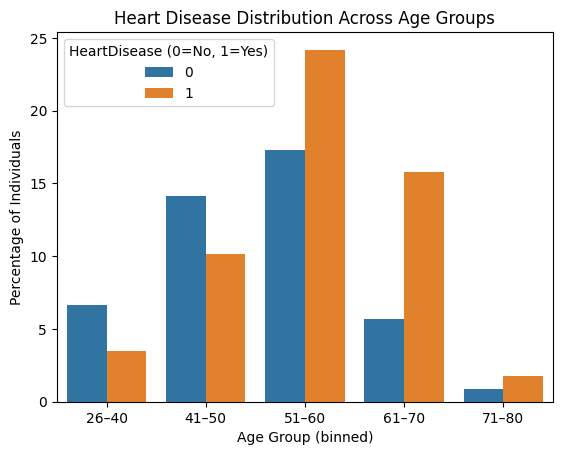

In [15]:
# Define explicit age bins
bins = [25, 40, 50, 60, 70, 80]
labels = ["26–40", "41–50", "51–60", "61–70", "71–80"]

# Create a new categorical column based on Age bins
heart_failure["AgeGroup"] = pd.cut(heart_failure["Age"], bins=bins, labels=labels)

# Plot
sns.countplot(
    data=heart_failure,
    x="AgeGroup",
    hue="HeartDisease",
    stat="percent"
)


plt.title("Heart Disease Distribution Across Age Groups")
plt.xlabel("Age Group (binned)")
plt.ylabel("Percentage of Individuals")
plt.legend(title="HeartDisease (0=No, 1=Yes)")
plt.show()


In [16]:
# Compute percentage
r7_percent = (
    heart_failure
    .groupby(["AgeGroup", "HeartDisease"])
    .size()
    .div(len(heart_failure))
    .mul(100)
    .unstack(fill_value=0)
    .round(2)
)

r7_percent

C:\Users\mike2\AppData\Local\Temp\ipykernel_19916\216509434.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["AgeGroup", "HeartDisease"])


HeartDisease,0,1
AgeGroup,,
26–40,6.64,3.49
41–50,14.16,10.13
51–60,17.32,24.18
61–70,5.66,15.80
71–80,0.87,1.74


Type of Analysis: Bivariate Analysis Numerical/Numerical

### R8 Insight: Oldpeak (which measures ST-segment depression during exercise relative to rest) and maximum heart rate show a weak negative relationship (correlation = –0.16), where higher Oldpeak values are generally associated with slightly lower maximum heart rate values.

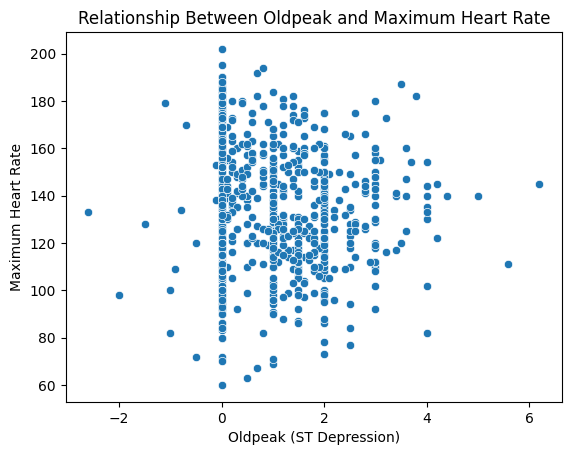

In [17]:
sns.scatterplot(
    data=heart_failure,
    x="Oldpeak",
    y="MaxHR"
)

plt.title("Relationship Between Oldpeak and Maximum Heart Rate")
plt.xlabel("Oldpeak (ST Depression)")
plt.ylabel("Maximum Heart Rate")
plt.show()


In [18]:
# Compute the Pearson correlation coefficient to numerically support the visual relationship
# between Oldpeak and MaxHR. A negative value indicates a downward trend, meaning that as
# Oldpeak increases, MaxHR generally decreases.
corr = float(round(heart_failure["Oldpeak"].corr(heart_failure["MaxHR"]), 2))
corr


-0.16

Type of Analysis: Bivariate Analysis Numerical/Numerical

### R9 Insight: MaxHR and Oldpeak are the most strongly correlated numerical features with heart disease, with a medium negative correlation for MaxHR (−0.40) and a medium positive correlation for Oldpeak (+0.40)

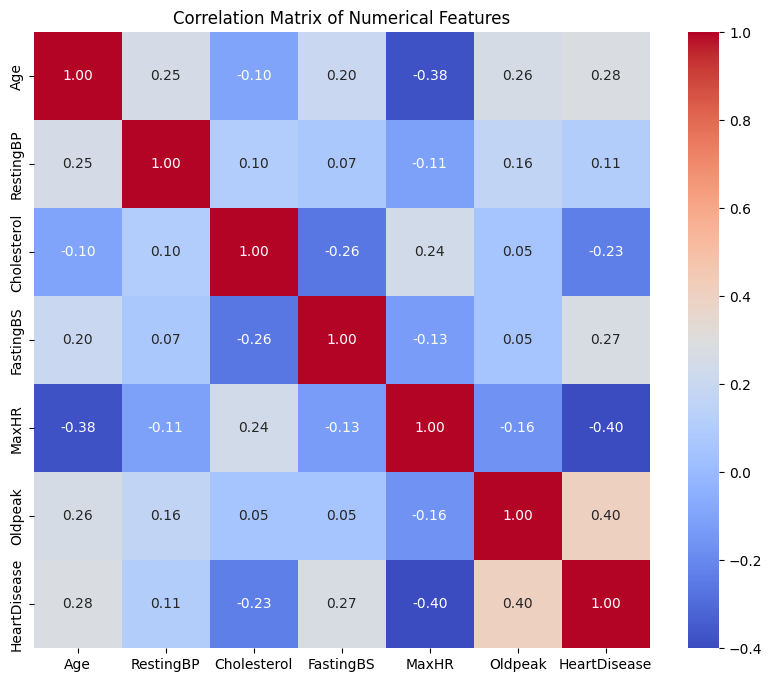

In [19]:
# Computing the correlation matrix for all numerical variables
numerical = heart_failure.select_dtypes(include=['number'])
corr_matrix = numerical.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Type of Analysis: Bivariate Analysis Numerical/Numerical (Correlation Heatmap)

### R10 Insight: Male patients with asymptomatic chest pain who experience exercise-induced angina (ASY_Y_M) have the highest heart disease rate (with a rate of ~92.42%)

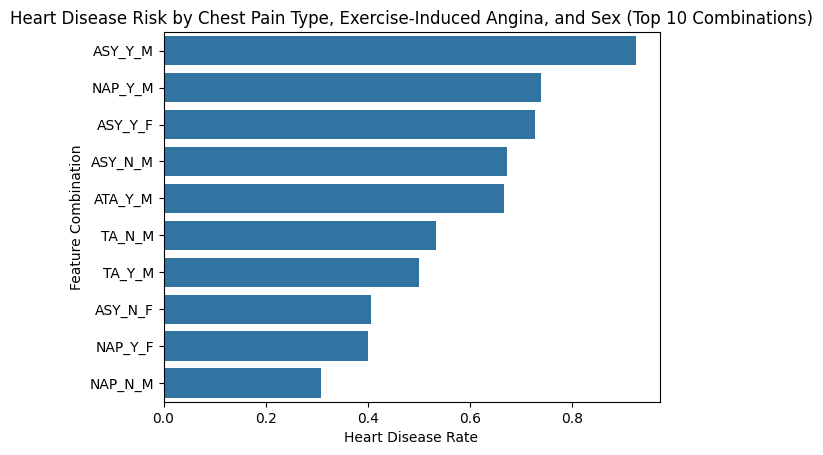

In [20]:
# Create a new column that combines three categorical features into a single patient profile
# This allows us to analyze heart disease risk for specific combinations of ChestPainType, ExerciseAngina, and Sex
heart_failure['Chest_Exercise_Sex'] = heart_failure['ChestPainType'] + '_' + heart_failure['ExerciseAngina'] + '_' + heart_failure['Sex']

# Group the dataset by the new combined category
# Then calculate the mean of 'HeartDisease' for each group
# Since 'HeartDisease' is binary (0 = no, 1 = yes), the mean represents the proportion of patients with heart disease
# Finally, sort the results in descending order to identify the highest-risk patient profiles
combo = heart_failure.groupby('Chest_Exercise_Sex')['HeartDisease'].mean().sort_values(ascending=False).reset_index()

# Plot top 10 combinations with highest heart disease rates
sns.barplot(y='Chest_Exercise_Sex', x='HeartDisease', data=combo.head(10))
plt.title("Heart Disease Risk by Chest Pain Type, Exercise-Induced Angina, and Sex (Top 10 Combinations)")
plt.xlabel("Heart Disease Rate")
plt.ylabel("Feature Combination")
plt.show()

In [21]:
# Compute Heart Disease Rate for each profile
heart_disease_rates = heart_failure.groupby('Chest_Exercise_Sex')['HeartDisease'].mean() * 100  # percentage

# Sort descending
heart_disease_rates = heart_disease_rates.sort_values(ascending=False)

# Display values
print(heart_disease_rates)


Chest_Exercise_Sex
ASY_Y_M    92.424242
NAP_Y_M    73.913043
ASY_Y_F    72.727273
ASY_N_M    67.283951
ATA_Y_M    66.666667
TA_N_M     53.333333
TA_Y_M     50.000000
ASY_N_F    40.540541
NAP_Y_F    40.000000
NAP_N_M    30.769231
ATA_Y_F    20.000000
ATA_N_M    11.881188
TA_N_F     10.000000
NAP_N_F     8.333333
ATA_N_F     5.454545
Name: HeartDisease, dtype: float64


Type of Analysis: Categorical/Categorical/Categorical (Heart Disease Rate by Combined Features)

## Insights for the Smartphone Specifications dataset

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

smartphone_url = "https://raw.githubusercontent.com/michaelmassaad02/CSI4142_Assignment1/refs/heads/main/cleaned_data.csv" 
smartphone_specifications = pd.read_csv(smartphone_url)

smartphone_specifications.shape

(968, 27)

### R1 Insight: Smartphone prices are right-skewed, with about 58.31% of devices priced in the lowest range (2999–24565.7 INR) and a small number of very high-priced models forming a long right tail.

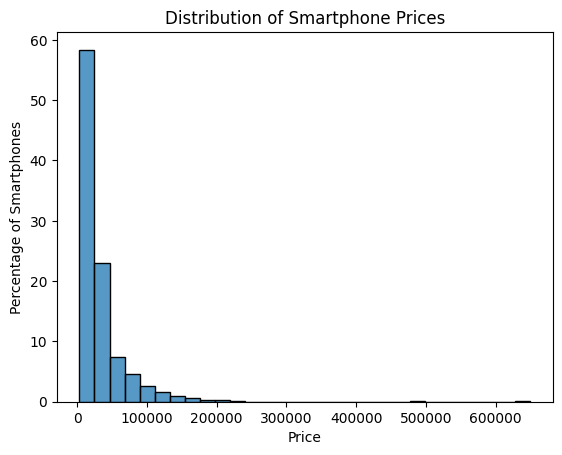

In [23]:

sns.histplot(data=smartphone_specifications, x="price", bins=30, kde=False, stat="percent")

plt.title("Distribution of Smartphone Prices")
plt.xlabel("Price")
plt.ylabel("Percentage of Smartphones")
plt.show()


In [24]:
import numpy as np

counts, bin_edges = np.histogram(
    smartphone_specifications["price"],
    bins=30
)

total = counts.sum()

first_bin_count = counts[0]
first_bin_percent = float(round((first_bin_count / total) * 100, 2))

first_bin_min = float(round(bin_edges[0], 2))
first_bin_max = float(round(bin_edges[1], 2))

first_bin_percent, (first_bin_min, first_bin_max)


(58.37, (2999.0, 24565.7))

Type of Analysis: Univariate Analysis Numerical Data

### R2 Insight: The most common operating system is Android V12, representing 39.26% of all smartphones in the dataset.

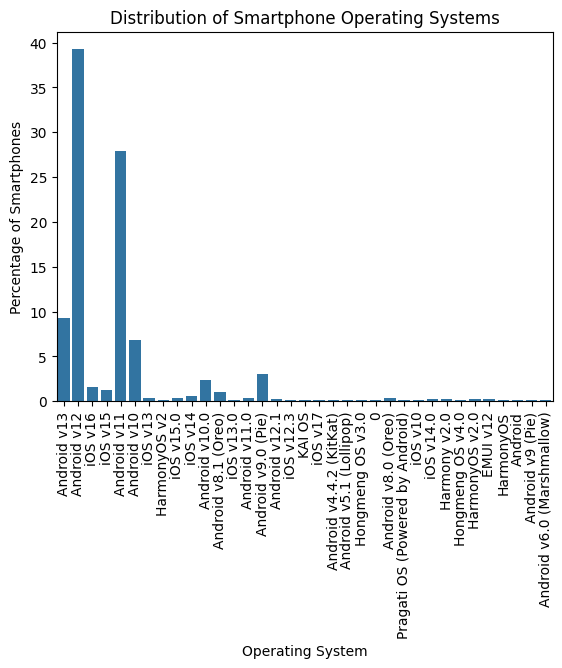

In [25]:
sns.countplot(
    data=smartphone_specifications,
    x="os",
    stat="percent"
)

plt.xticks(rotation=90)
plt.title("Distribution of Smartphone Operating Systems")
plt.xlabel("Operating System")
plt.ylabel("Percentage of Smartphones")
plt.show()


In [26]:
# total number of smartphones
total = len(smartphone_specifications)

# count each OS
os_counts = smartphone_specifications["os"].value_counts()

# most used OS and its count
top_os = os_counts.index[0]
top_os_count = os_counts.iloc[0]

# percentage
top_os_percentage = round((top_os_count / total) * 100, 2)

top_os, f"{top_os_percentage}%"


('Android v12', '39.26%')

Type of Analysis: Univariate Categoical Data Analysis

### R3 Insight: Android-based smartphones account for 91.32% of the dataset, followed by iOS devices at 4.75%, while other operating systems together represent only 3.93% of all smartphones.

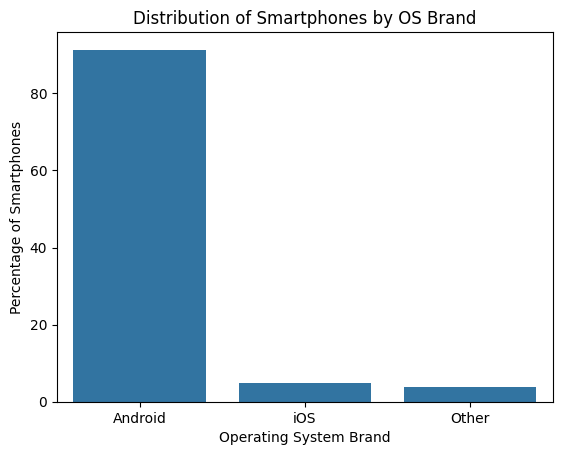

In [27]:
# Create a new column for OS Brand
def map_os(os_name):
    os_name = str(os_name).lower()
    if "android" in os_name:
        return "Android"
    elif "ios" in os_name or "iphone" in os_name:
        return "iOS"
    else:
        return "Other"

smartphone_specifications["OS_Brand"] = smartphone_specifications["os"].apply(map_os)

# Plot
sns.countplot(
    data=smartphone_specifications,
    x="OS_Brand",
    stat="percent"
)

plt.title("Distribution of Smartphones by OS Brand")
plt.xlabel("Operating System Brand")
plt.ylabel("Percentage of Smartphones")
plt.show()


In [28]:
#Percentage of OS brands
total = len(smartphone_specifications)

os_counts = smartphone_specifications["OS_Brand"].value_counts()
os_percent = round((os_counts / total) * 100, 2)

os_percent

OS_Brand
Android    91.32
iOS         4.75
Other       3.93
Name: count, dtype: float64

Type of Analysis: Univariate Categorical Data Analysis

### R4 Insight: Smartphones running on Other operating systems have the highest median price (93,619.50 INR), followed by iOS (84,994.50 INR), while Android devices have a substantially lower median price (18,994.50 INR).

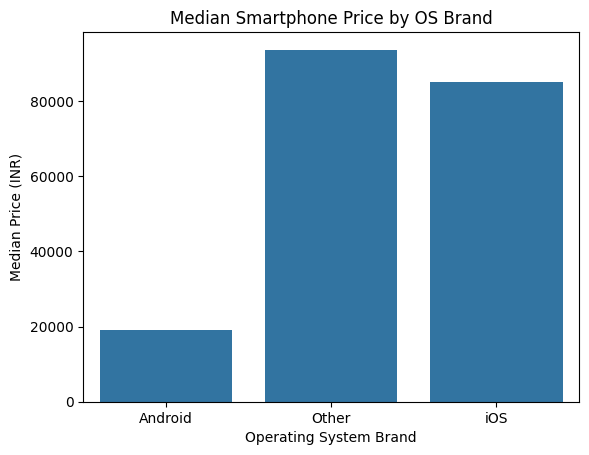

In [29]:
# Compute median price per OS brand
median_prices = smartphone_specifications.groupby("OS_Brand")["price"].median().reset_index()

# Plot
sns.barplot(data=median_prices, x="OS_Brand", y="price")

plt.title("Median Smartphone Price by OS Brand")
plt.xlabel("Operating System Brand")
plt.ylabel("Median Price (INR)")
plt.show()



In [30]:
#Extract medians
median_prices = smartphone_specifications.groupby("OS_Brand")["price"].median()

# Print medians
for os, value in median_prices.items():
    print(f"{os}: {float(round(value, 2))} INR")

Android: 18994.5 INR
Other: 93619.5 INR
iOS: 84994.5 INR


Type of Analysis: Bivariate Numerical/Categorical Data Analysis

### R5 Insight: As a percentage of the entire dataset, smartphones that support both 5G and Dual SIM represent 55.48%, while devices without 5G and without Dual SIM account for 0.83% of all models.

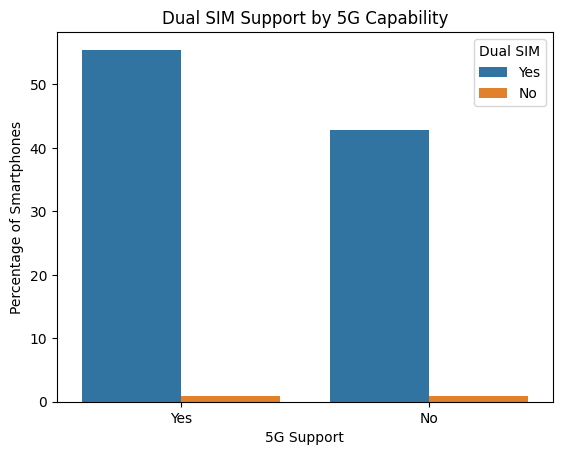

In [31]:
# 5G support (Yes/No)
smartphone_specifications["Has_5G"] = (
    smartphone_specifications["network_type"]
    .str.contains("5G", case=False, na=False)
    .map({True: "Yes", False: "No"})
)

# Dual SIM support (Yes/No)
smartphone_specifications["Dual_SIM"] = (
    smartphone_specifications["sim_type"]
    .str.contains("Dual", case=False, na=False)
    .map({True: "Yes", False: "No"})
)

sns.countplot(
    data=smartphone_specifications,
    x="Has_5G",
    hue="Dual_SIM",
    stat="percent"
)

plt.title("Dual SIM Support by 5G Capability")
plt.xlabel("5G Support")
plt.ylabel("Percentage of Smartphones")
plt.legend(title="Dual SIM")
plt.show()


In [32]:
total = len(smartphone_specifications)

r5_percent = (
    smartphone_specifications
    .groupby(["Has_5G", "Dual_SIM"])
    .size()
    .div(total)
    .mul(100)
    .unstack(fill_value=0)
    .round(2)
)

r5_percent


Dual_SIM,No,Yes
Has_5G,,
No,0.83,42.87
Yes,0.83,55.48


Type of Analysis: Bivariate Categorical/Categorical Data Analysis

### R6 Insight: Smartphones running Android v12 (5G) represent the largest single group in the dataset (26.34%), followed by Android v11 (4G) (15.81%) and Android v12 (4G) (12.91%), while all non-Android operating systems each account for less than 2% individually.

C:\Users\mike2\AppData\Local\Temp\ipykernel_19916\414096536.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['os', 'network_type'])
C:\Users\mike2\AppData\Local\Temp\ipykernel_19916\414096536.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('os')['Percentage']


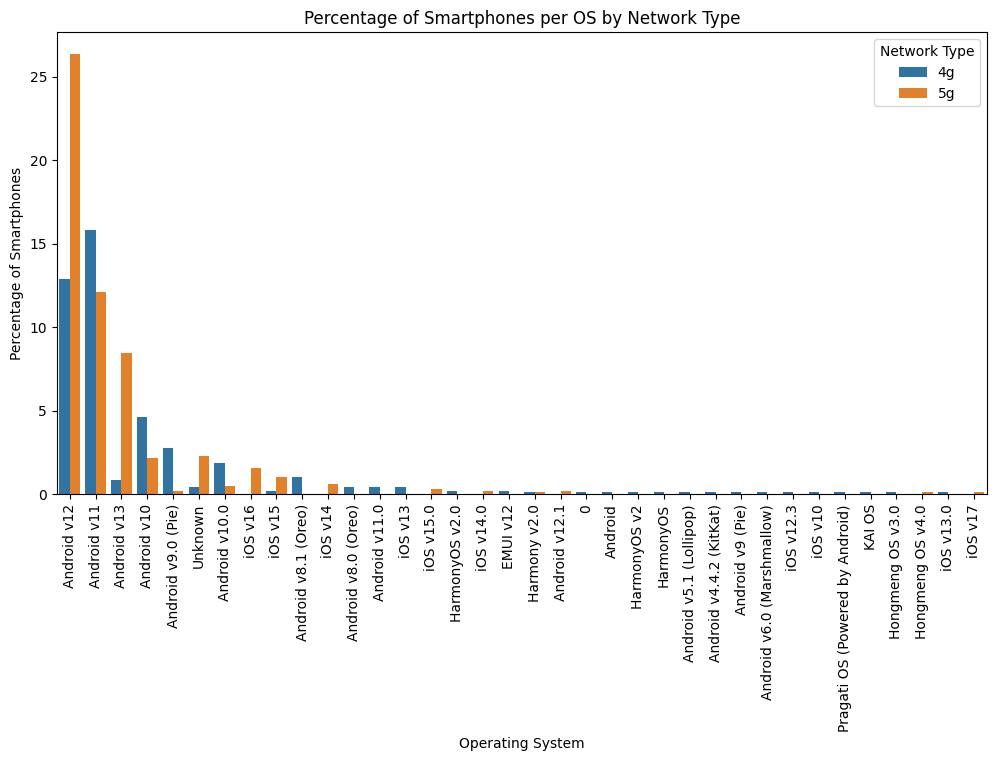

In [33]:
# Fill missing values and ensure categorical type
smartphone_specifications['os'] = smartphone_specifications['os'].fillna('Unknown').astype('category')
smartphone_specifications['network_type'] = smartphone_specifications['network_type'].fillna('Unknown').astype('category')

# Total dataset size
total = len(smartphone_specifications)

# Count + convert to percentage
os_network_percent = (
    smartphone_specifications
    .groupby(['os', 'network_type'])
    .size()
    .div(total)
    .mul(100)
    .reset_index(name='Percentage')
)

# Sort OS by total percentage
os_order = (
    os_network_percent
    .groupby('os')['Percentage']
    .sum()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# Sort network types alphabetically (or keep your own logic)
network_order = sorted(smartphone_specifications['network_type'].unique())

# Plot grouped bar chart (PERCENT)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=os_network_percent,
    x='os',
    y='Percentage',
    hue='network_type',
    order=os_order,
    hue_order=network_order
)

plt.title("Percentage of Smartphones per OS by Network Type")
plt.xlabel("Operating System")
plt.ylabel("Percentage of Smartphones")
plt.xticks(rotation=90)
plt.legend(title="Network Type")
plt.show()

In [34]:
#Extract Percentages
total = len(smartphone_specifications)

# Percentage table for OS × Network Type
os_network_percent = (
    smartphone_specifications
    .groupby(['os', 'network_type'])
    .size()
    .div(total)
    .mul(100)
    .reset_index(name='Percentage')
)

# Round nicely
os_network_percent["Percentage"] = os_network_percent["Percentage"].round(2)

os_network_percent


C:\Users\mike2\AppData\Local\Temp\ipykernel_19916\2074569541.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['os', 'network_type'])


,os,network_type,Percentage
0,0,4g,0.10
1,0,5g,0.00
2,Android,4g,0.10
3,Android,5g,0.00
4,Android v10,4g,4.65
...,...,...,...
67,iOS v15.0,5g,0.31
68,iOS v16,4g,0.00
69,iOS v16,5g,1.55
70,iOS v17,4g,0.00


Type of Analysis: Bivariate Categorical/Categorical Data Analysis

### R7 Insight: Phones priced between 0–15,000 INR include 29.44% without 5G and only 4.55% with 5G, while phones priced between 60,000–200,000 INR include 11.05% with 5G and only 1.03% without 5G, showing that 5G support appears far more frequently in higher price ranges.

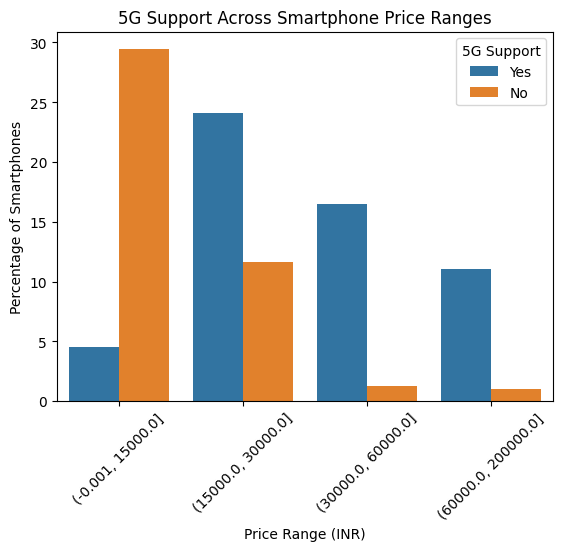

In [35]:
# Define price bins (INR)
bins = [0, 15000, 30000, 60000, 200000]

smartphone_specifications["Price_Bin"] = pd.cut(
    smartphone_specifications["price"],
    bins=bins,
    include_lowest=True
)


#plot
sns.countplot(
    data=smartphone_specifications,
    x="Price_Bin",
    hue="Has_5G",
    stat="percent"
)

plt.title("5G Support Across Smartphone Price Ranges")
plt.xlabel("Price Range (INR)")
plt.ylabel("Percentage of Smartphones")
plt.xticks(rotation=45)
plt.legend(title="5G Support")
plt.show()


In [36]:
#Extract percentages0\
total = len(smartphone_specifications)

r7 = (
    smartphone_specifications
    .groupby(["Price_Bin", "Has_5G"])
    .size()
    .div(total)
    .mul(100)
    .unstack(fill_value=0)
    .round(2)
)

r7

C:\Users\mike2\AppData\Local\Temp\ipykernel_19916\2750982247.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Price_Bin", "Has_5G"])


Has_5G,No,Yes
Price_Bin,,
"(-0.001, 15000.0]",29.44,4.55
"(15000.0, 30000.0]",11.67,24.07
"(30000.0, 60000.0]",1.24,16.53
"(60000.0, 200000.0]",1.03,11.05


Type of Analysis: Bivariate Categorical/Numerical Analysis

### R8 Insight: The scatterplot shows almost no linear relationship between RAM and smartphone price (correlation ≈ 0.01), indicating that RAM alone does not explain variations in price within this dataset.

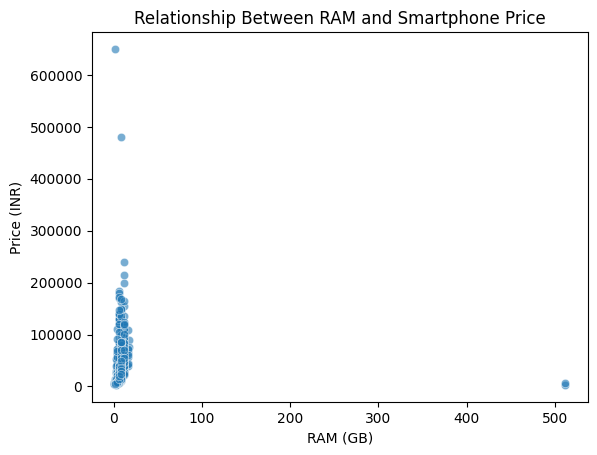

In [37]:
sns.scatterplot(
    data=smartphone_specifications,
    x="ram_gb",
    y="price",
    alpha=0.6
)

plt.title("Relationship Between RAM and Smartphone Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (INR)")
plt.show()




In [38]:
corr = smartphone_specifications["ram_gb"].corr(smartphone_specifications["price"])
print(f"{float(corr):.2f}")


0.01


Type of Analysis: Bivariate Numerical/Numerical Data Analysis

### R9 Insight: The two strongest correlations in the dataset are between RAM and storage capacity (1.00) and between price and clock ghz (0.64), while the weakest relationships are observed between price and rear camera resolution (0.04) and between price and battery capacity (−0.14)

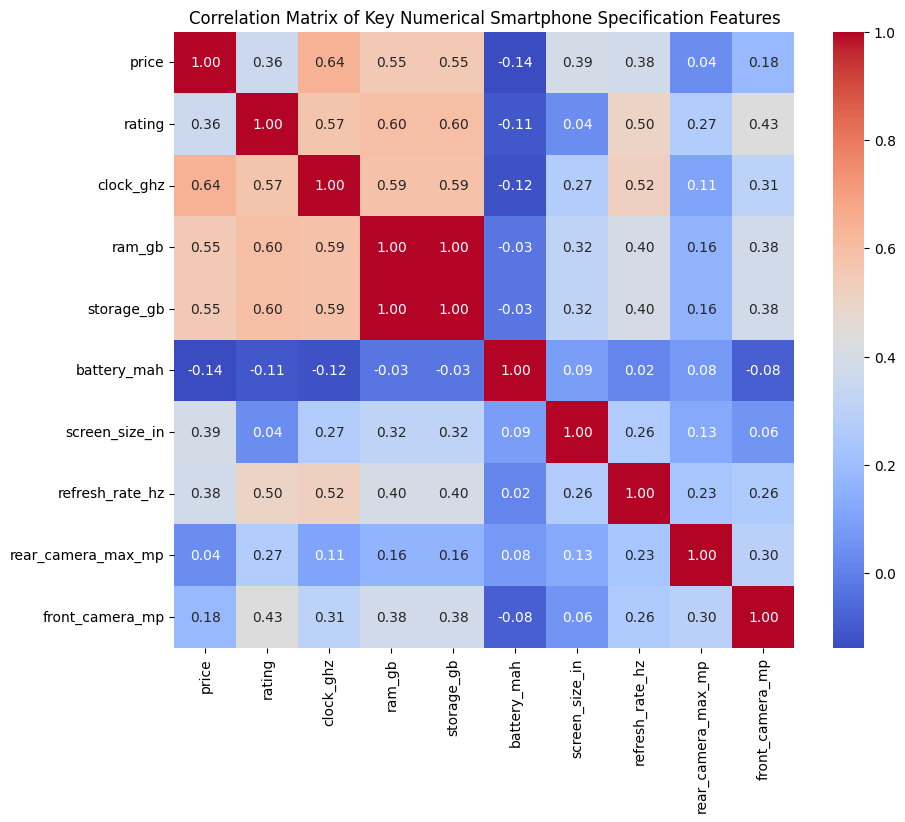

In [43]:
num_features = ["price", "rating", "clock_ghz", "ram_gb", "storage_gb", "battery_mah", "screen_size_in", "refresh_rate_hz", "rear_camera_max_mp", "front_camera_mp"]

numerical = smartphone_specifications[num_features].dropna()

corr_matrix = numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Key Numerical Smartphone Specification Features")
plt.show()

Type of Analysis: Multivariate Analysis Numerical/Numerical (Correlation Heatmap)

### R10 Insight: RAM capacity varies significantly across display types, with Punch Hole displays averaging 7.48GB, Large Notch at 5.28GB, and Water Drop Notch at 4.91GB

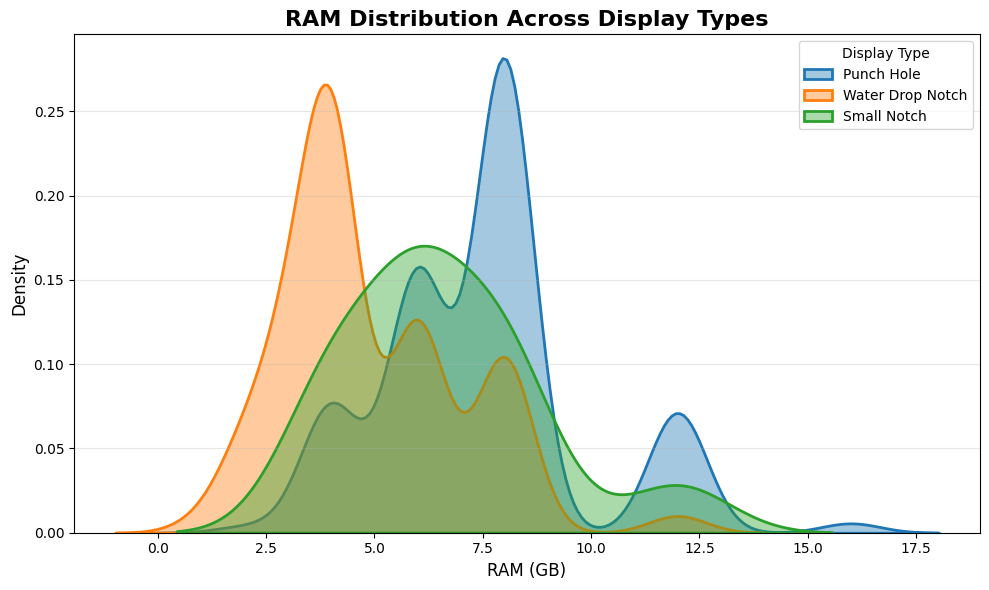

In [73]:
# Filter out missing values for clean analysis
data_clean = smartphone_specifications[['display_type', 'ram_gb']].dropna()

# Get the top 3 most common display types to avoid cluttering the visualization
top_displays = data_clean['display_type'].value_counts().head(3).index
data = data_clean[data_clean['display_type'].isin(top_displays)]

# Create overlapping density plots (KDE) for RAM distribution by display type
# KDE plots show the probability density of RAM values, revealing distribution patterns (source: https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
plt.figure(figsize=(10, 6))
for display in top_displays:
    subset = data[data['display_type'] == display]
    # creating KDE plot for each display type and showing overlapping distributions
    sns.kdeplot(data=subset, x='ram_gb', label=display, fill=True, alpha=0.4, linewidth=2)

plt.title('RAM Distribution Across Display Types', fontsize=16, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Display Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [74]:
stats = data_clean.groupby('display_type')['ram_gb'].describe()[['count', 'mean', '50%', 'min', 'max']]
stats.columns = ['Count', 'Mean (GB)', 'Median (GB)', 'Min (GB)', 'Max (GB)']
print(stats.round(2))

                  Count  Mean (GB)  Median (GB)  Min (GB)  Max (GB)
display_type                                                       
Dual Punch Hole     6.0       8.33          8.0       6.0      12.0
Large Notch        18.0       5.28          5.0       3.0      12.0
Punch Hole        531.0       7.48          8.0       2.0      16.0
Small Notch        24.0       6.58          6.0       4.0      12.0
Water Drop Notch  304.0       4.91          4.0       1.0      12.0


Type of Analysis: Bivariate Analysis Categorical/Numerical (Overlapping KDE plots)

## Conclusion

In this report, we explored two datasets from different domains: a healthcare dataset on heart failure and a technology dataset on smartphone specifications. Using a variety of exploratory data analysis techniques, we examined how key variables are distributed and how they relate to one another, allowing us to uncover meaningful patterns in both datasets.

For the Heart Failure Prediction dataset, the analysis highlighted several clear trends in patient characteristics and clinical measurements, such as age distributions, differences between groups, and relationships between health indicators. These findings show how EDA can help summarize complex medical data and point to areas that may be worth investigating further.

For the Smartphone Specifications dataset, the results revealed noticeable patterns in pricing, operating systems, and feature availability. The dominance of newer Android versions, the spread of prices across different ranges, and the link between higher prices and advanced features demonstrate how exploratory analysis can make large product datasets easier to understand.

Overall, this project shows how EDA can turn raw data into clear, useful insights. By combining simple visualizations with numerical summaries, we were able to describe each dataset in an accessible way and set the stage for more advanced analysis in the future.

## References

Fedesoriano. (2021). Heart Failure Prediction Dataset. Kaggle.
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Devgondaliya007. (2023). Smartphone Specifications Dataset. Kaggle.
https://www.kaggle.com/datasets/devgondaliya007/smartphone-specifications-dataset

OpenAI. (2026). ChatGPT (GPT-based language model).
Used to assist with data preprocessing ideas, binning strategies, debugging Python code, visualization setup, and wording of insights while all analysis, plots, and final interpretations were validated by the authors.

Seaborn.kdeplot. seaborn.kdeplot - seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.kdeplot.html 